In [1]:
from __future__ import division
from scipy.special import zeta
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
"""The normalization function Z(alpha,xmin,xmax).  Note that default arguments 
of xmin and xmax make Z equivalent to Riemann zeta function which is already 
implemented in Scipy as zeta(alpha,1)"""

def Z(gamma,xmin=1,xmax=np.infty,discrete=True):
    if discrete==True: #when powerlaw is discrete
        if np.isfinite(xmax): #if xmax is NOT infinity:
            #Calculate zeta from Xmin to Infinity and substract Zeta from Xmax to Infinity
            #To find zeta from Xmin to Xmax.
            s=zeta(gamma, xmin)-zeta(gamma, xmax)
        else:
            #if xmax is infinity, simply calculate zeta from Xmin till infinity.
            s=zeta(gamma,xmin)
    else:
        #calculate normalization function when powerlaw is continuous.
        #s=(xmax^(-gamma+1)/(1-gamma))-(xminx^(-gamma+1)/(1-gamma))
        s = (xmax**(-gamma + 1) / (1 - gamma)) - (xmin**(-gamma + 1) / (1 - gamma))
    return s

In [51]:
def Z_prime(gamma,xmin=1,xmax=np.infty,discrete=True):
    h = 1e-8
    s = (Z(gamma + h,xmin=xmin,xmax=xmax,discrete=discrete) - Z(gamma - h,xmin=xmin,xmax=xmax,discrete=discrete)) / (2 * h)
    return s

In [52]:
def Z_prime2(gamma,xmin=1,xmax=np.infty,discrete=True):
    h = 1e-4
    s = (Z(gamma + h,xmin=xmin,xmax=xmax,discrete=discrete) - 2*Z(gamma,xmin=xmin,xmax=xmax,discrete=discrete) + Z(gamma - h,xmin=xmin,xmax=xmax,discrete=discrete)) / (h**2)
    return s

In [8]:
"first derivative of Z"
def Zprime(alpha,xmin=1,xmax=np.infty):
    h = 1e-8
    return (Z(alpha+h,xmin,xmax) - Z(alpha-h,xmin,xmax))/(2*h)

"second derivative of Z"
def Zprimeprime(alpha,xmin=1,xmax=np.infty):
    h = 1e-4
    return (Z(alpha+h,xmin,xmax) - (2*Z(alpha,xmin,xmax)) + Z(alpha-h,xmin,xmax))/(h*h)

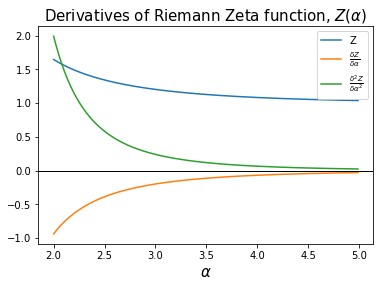

In [39]:
x=np.arange(2,5,0.01)
plt.plot(x,Z(x),label='Z')
plt.plot(x,Zprime(x),label=r'${\frac{\delta Z}{\delta \alpha}}$')
plt.plot(x,Zprimeprime(x),label=r'${\frac{\delta^2 Z}{\delta \alpha^2}}$')
plt.axhline(y=0,color='black',linewidth=1)
plt.title(r'Derivatives of Riemann Zeta function, $Z(\alpha)$',size=15)
plt.xlabel(r'$\alpha$',size=15)
plt.legend()
plt.show()

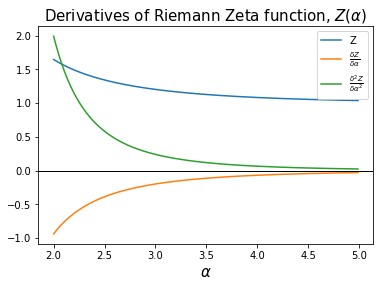

In [53]:
x=np.arange(2,5,0.01)
plt.plot(x,Z(x),label='Z')
plt.plot(x,Z_prime(x),label=r'${\frac{\delta Z}{\delta \alpha}}$')
plt.plot(x,Z_prime2(x),label=r'${\frac{\delta^2 Z}{\delta \alpha^2}}$')
plt.axhline(y=0,color='black',linewidth=1)
plt.title(r'Derivatives of Riemann Zeta function, $Z(\alpha)$',size=15)
plt.xlabel(r'$\alpha$',size=15)
plt.legend()
plt.show()

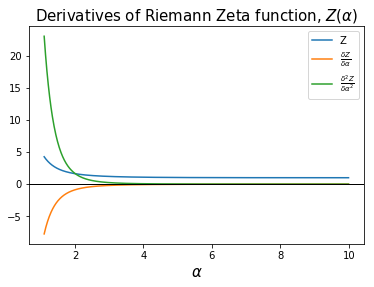

In [41]:
x=np.arange(1.1,10,0.01)
plt.plot(x,Z(x,xmax=100),label='Z')
plt.plot(x,Zprime(x,xmax=100),label=r'${\frac{\delta Z}{\delta \alpha}}$')
plt.plot(x,Zprimeprime(x,xmax=100),label=r'${\frac{\delta^2 Z}{\delta \alpha^2}}$')
plt.axhline(y=0,color='black',linewidth=1)
plt.title(r'Derivatives of Riemann Zeta function, $Z(\alpha)$',size=15)
plt.xlabel(r'$\alpha$',size=15)
plt.legend()
plt.show()

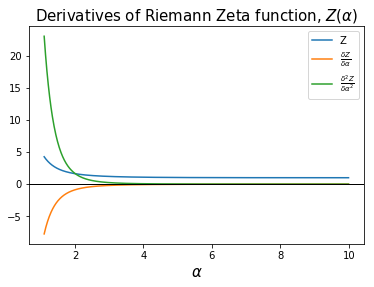

In [42]:
x=np.arange(1.1,10,0.01)
plt.plot(x,Z(x,xmax=100),label='Z')
plt.plot(x,Z_prime(x,xmax=100),label=r'${\frac{\delta Z}{\delta \alpha}}$')
plt.plot(x,Zprimeprime(x,xmax=100),label=r'${\frac{\delta^2 Z}{\delta \alpha^2}}$')
plt.axhline(y=0,color='black',linewidth=1)
plt.title(r'Derivatives of Riemann Zeta function, $Z(\alpha)$',size=15)
plt.xlabel(r'$\alpha$',size=15)
plt.legend()
plt.show()

In [57]:
def Z_jeffrey(gamma,xmin=1,xmax=np.infty,discrete=True):
    z=np.sqrt((Z_prime2(gamma,xmin=xmin,xmax=xmax,discrete=discrete))/Z(gamma,xmin=xmin,xmax=xmax,discrete=discrete)-Z_prime(gamma,xmin=xmin,xmax=xmax,discrete=discrete)**2/Z(gamma,xmin=xmin,xmax=xmax,discrete=discrete)**2)
    return z

In [25]:
"Jeffreys Prior for Discrete Distributions"
def DiscreteJP(alpha,xmin=1,xmax=np.infty):
    return np.sqrt(Zprimeprime(alpha,xmin,xmax)/Z(alpha,xmin,xmax)-np.power((Zprime(alpha,xmin,xmax)/Z(alpha,xmin,xmax)),2))

"Jeffreys Prior for Continuous Distributions"
def ContinJP(alpha,xmin=1,xmax=np.infty):
    return (np.power(xmin,-alpha+1)-np.power(xmax,-alpha+1))/(alpha-1)

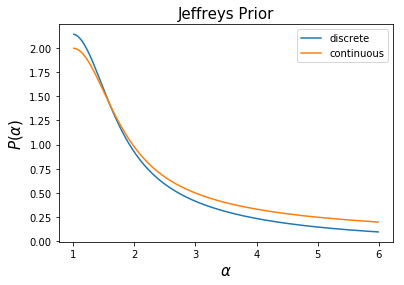

In [74]:
x=np.arange(1.01,6,0.01)
plt.plot(x,Z_jeffrey(x,xmax=1000,discrete=True),label='discrete')
plt.plot(x,Z_jeffrey(x,xmax=1000,discrete=False),label='continuous')
plt.title('Jeffreys Prior',size=15)
plt.xlabel(r'$\alpha$',size=15)
plt.ylabel(r'$P(\alpha)$',size=15)
plt.legend()
plt.show()

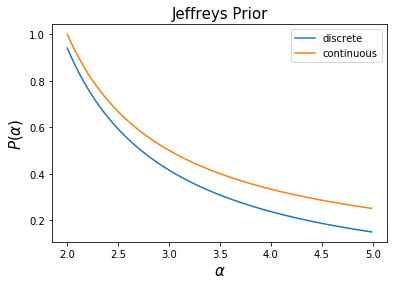

In [69]:
x=np.arange(2,5,0.01)
plt.plot(x,DiscreteJP(x),label='discrete')
plt.plot(x,ContinJP(x),label='continuous')
plt.title('Jeffreys Prior',size=15)
plt.xlabel(r'$\alpha$',size=15)
plt.ylabel(r'$P(\alpha)$',size=15)
plt.legend()
plt.show()

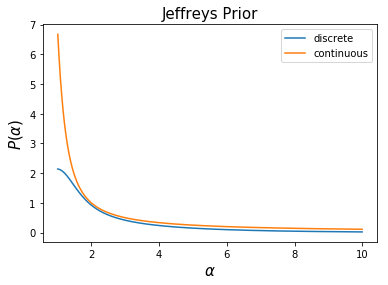

In [71]:
x=np.arange(1.01,10,0.01)
plt.plot(x,DiscreteJP(x,xmax=1000),label='discrete')
plt.plot(x,ContinJP(x,xmax=1000),label='continuous')
plt.title('Jeffreys Prior',size=15)
plt.xlabel(r'$\alpha$',size=15)
plt.ylabel(r'$P(\alpha)$',size=15)
plt.legend()
plt.show()

In [75]:
import powerlaw as pl

In [84]:
data1=pl.power_law(1.1,1000,1000)
data2=pl.power_law(3.1,1000,1000)
data=np.concatenate((data1,data2),axis=0)

In [88]:
fit=pl.Fit_Bayes(data,mixed=2)

In [89]:
gammas,weight=fit.posterior()

In [90]:
gammas

array([[ 2.74375121,  2.69979704,  2.69979704, ...,  2.93063782,
         2.93063782,  2.93063782],
       [ 1.05193444,  1.05139902,  1.05139902, ...,  1.05894385,
         1.05894385,  1.05894385]])

In [91]:
weight

array([[ 0.51573605,  0.53503152,  0.53503152, ...,  0.49252192,
         0.49252192,  0.49252192],
       [ 0.48426395,  0.46496848,  0.46496848, ...,  0.50747808,
         0.50747808,  0.50747808]])

In [115]:
data=pl.power_law(2.0,1000,1000,discrete=False)

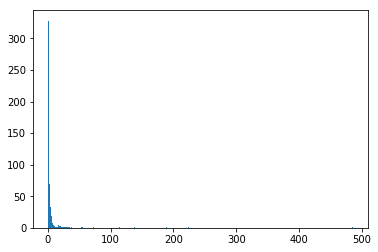

In [158]:
yx=plt.hist(data,bins=1000)

In [159]:
y=(yx[0])
x=((yx[1])[0:-1])

In [150]:
y

array([ 837.,   80.,   20.,   24.,   11.,    6.,    4.,    4.,    0.,
          3.,    1.,    1.,    1.,    0.,    1.,    0.,    0.,    0.,
          1.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
          0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    1.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.])

/Users/kgrigait/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


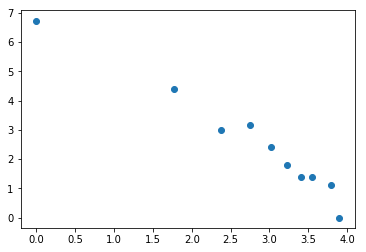

In [151]:
plt.scatter(np.log(x)[0:11],np.log(y)[0:11])

In [105]:
from scipy import stats

In [111]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(x)[0:11], np.log(y)[0:11])

In [160]:
x_f=x[y!=0]
y_f=y[y!=0]

In [163]:
import pandas as pd

In [167]:
df=pd.DataFrame(index=(range(10)))

In [168]:
df['exponent']=np.arange(10)

In [169]:
df

,exponent
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [161]:
-stats.linregress(np.log(x_f)[0:11], np.log(y_f)[0:11])[0]

1.8238849656102285